# <center>  EDA </br>
#  <center> -- Análisis Exploratorio de Datos--</center>
Como científicos de datos y analistas, se exploran diferentes aspectos de los datos, como la distribución de variables, relaciones entre variables, tendencias a lo largo del tiempo, y cualquier otra característica que pueda ser relevante para comprender la naturaleza de los datos.
<center> Aquí lo haremos sobre los datos del dataframe 'df_reviews'

### <center>Importar Librerias</center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import funciones
import os

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

____________

### <center>Extracción de datos</center>

In [2]:
# Se obtiene la ruta completa al archivo CSV desde la ubicación del notebook
csv_path = os.path.join('..', 'CSV', 'reviews_limpio.csv')

# Se lee el archivo CSV
df_reviews = pd.read_csv(csv_path, encoding='utf-8')

_______________

In [3]:
# Se visualiza el dataframe
df_reviews

,posted,item_id,helpful,recommend,user_id,sentiment_analysis
0,2011-11-05,1250,No ratings yet,1.0,76561197970982479,1
1,2011-07-15,22200,No ratings yet,1.0,76561197970982479,2
2,2011-04-21,43110,No ratings yet,1.0,76561197970982479,1
3,2014-06-24,251610,15 of 20 people (75%) found this review helpful,1.0,js41637,1
4,2013-09-08,227300,0 of 1 people (0%) found this review helpful,1.0,js41637,1
...,...,...,...,...,...,...
48493,2015-10-14,730,1 of 1 people (100%) found this review helpful,1.0,wayfeng,1
48494,2015-10-10,253980,No ratings yet,1.0,76561198251004808,2
48495,2015-10-31,730,No ratings yet,1.0,72947282842,0
48496,2015-12-14,730,No ratings yet,1.0,ApxLGhost,1


______________

### <center>Verificación de tipo de datos y nulos</center>

In [4]:
# Se utiliza la funcion creada para la validadción de los datos
funciones.verificar_tipo_datos(df_reviews)

,Columna,Tipo,NO_nulos_%,Nulos_%,Nulos
0,posted,[<class 'str'>],100.0,0.0,0
1,item_id,[<class 'int'>],100.0,0.0,0
2,helpful,[<class 'str'>],100.0,0.0,0
3,recommend,[<class 'float'>],100.0,0.0,0
4,user_id,[<class 'str'>],100.0,0.0,0
5,sentiment_analysis,[<class 'int'>],100.0,0.0,0


________________

### <center>Columna posted</center>
<center>Se analiza la cantidad de reviews por fecha cargada</center>

In [5]:
# Se convierte la columna 'posted' a objetos datetime
df_reviews['posted'] = pd.to_datetime(df_reviews['posted'], errors='coerce')

# Se verifica si hay fechas sin año (NaN representa fechas inválidas)
fechas_sin_year = df_reviews['posted'][df_reviews['posted'].dt.year.isna()]

# se muestra las fechas sin año, si las hay
if not fechas_sin_year.empty:
    print("Existen fechas sin año en la columna 'posted':")
    print(fechas_sin_year)
else:
    print("Todas las fechas en la columna 'posted' tienen un año válido.")

Todas las fechas en la columna 'posted' tienen un año válido.


In [6]:
# Se convierte la columna 'posted' a objetos datetime
df_reviews['posted'] = pd.to_datetime(df_reviews['posted'], errors='coerce')

# Se encuentra el rango de años
year_minimo = df_reviews['posted'].dt.year.min()
year_maximo = df_reviews['posted'].dt.year.max()

# Se muestra el rango de años
print(f"Las fechas en 'posted' van desde el año {year_minimo} hasta el año {year_maximo}.")


Las fechas en 'posted' van desde el año 2010 hasta el año 2015.


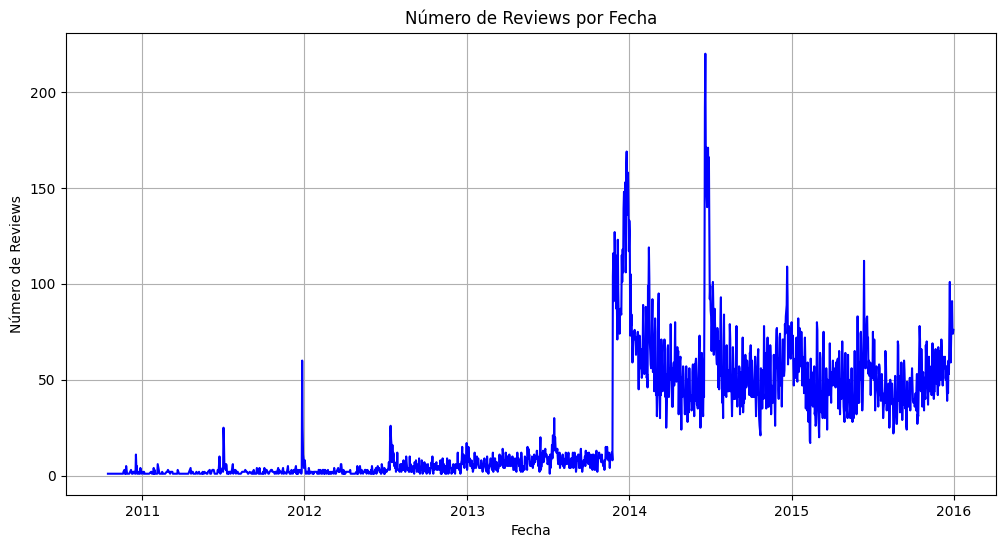

In [7]:
# Se verifica que se convirtió'posted' a objetos datetime
df_reviews['posted'] = pd.to_datetime(df_reviews['posted'], errors='coerce')

# Se agrupa por fecha y cuenta el número de reviews para cada fecha
reviews_por_fecha = df_reviews.groupby(df_reviews['posted'].dt.date).size()

# Se grafica el número de reviews por fecha sin puntos
plt.figure(figsize=(12, 6))
plt.plot(reviews_por_fecha.index, reviews_por_fecha.values, linestyle='-', marker='', color='b')
plt.title('Número de Reviews por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Reviews')
plt.grid(True)
plt.show()


### Conclusión: Se observa una cantidad de reviews por día baja los primeros 3 años, ya en los 2 años siguientes aumenta considerablemente. Habiendo un pico importante entre el año 2014 y 2016

___________________

### <center>Columna recomend</center>
<center>Se analiza si se recomiendan o no los juegos</center>

In [8]:
# Se verifica la cantidad de ocurrencia de cada valor y su porcentaje
funciones.valor_en_porcentaje(df_reviews, 'recommend')

,Cantidad,Porcentaje
recommend,,
1.0,43557,89.81%
0.0,4941,10.19%


GRAFICAMOS

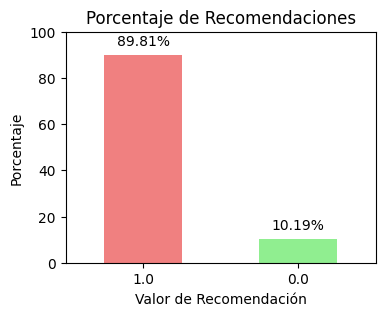

In [14]:
# Se agrupa por el valor en la columna 'recommend' y se cuenta la cantidad de registros
recomend_counts = df_reviews['recommend'].value_counts()

# Se calcula el porcentaje de cada valor
recomend_percentages = recomend_counts / recomend_counts.sum() * 100

# Colores diferentes para cada valor en 'recommend'
recomend_colores = ['lightcoral', 'lightgreen']

# Se grafica el porcentaje de recomendaciones
plt.figure(figsize=(4, 3))
ax_recomend = recomend_percentages.plot(kind='bar', color=recomend_colores)
plt.title('Porcentaje de Recomendaciones')
plt.xlabel('Valor de Recomendación')
plt.ylabel('Porcentaje')
plt.ylim(0, 100)  
plt.xticks(rotation=0)  

# Se agrega el símbolo '%' 
for p in ax_recomend.patches:
    ax_recomend.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


### Conclusión: el casi 90% recomiendan los juegos que consumen

______________

### <center>Columna sentiment_analysis</center>
<center>Se analiza los 3 valores que toma este campo</center>

In [10]:
# Se verifican los valores y ocurrencias
funciones.valor_en_porcentaje(df_reviews, 'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
1,29456,60.74%
2,14895,30.71%
0,4147,8.55%


GRAFICAMOS

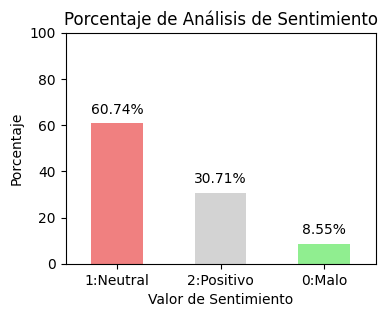

In [16]:
# Se mapea los valores numéricos a etiquetas descriptivas
etiquetas_descriptivas = {0: '0:Malo', 1: '1:Neutral', 2: '2:Positivo'}
df_reviews['sentiment_labels'] = df_reviews['sentiment_analysis'].map(etiquetas_descriptivas)

# Se agrupa por el valor en la columna 'sentiment_labels' y contar la cantidad de registros
sentiment_counts = df_reviews['sentiment_labels'].value_counts()

# Se calcula el porcentaje de cada valor
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

# Colores diferentes para cada etiqueta
colores = ['lightcoral', 'lightgray', 'lightgreen']

# Se graficar el porcentaje de análisis de sentimiento
plt.figure(figsize=(4, 3))
ax = sentiment_percentages.plot(kind='bar', color=colores)
plt.title('Porcentaje de Análisis de Sentimiento')
plt.xlabel('Valor de Sentimiento')
plt.ylabel('Porcentaje')
plt.ylim(0, 100)  # Ajusta el rango del eje y si es necesario
plt.xticks(rotation=0)  # Ajusta la rotación de las etiquetas del eje x si es necesario

# Se agregar el símbolo '%' dentro de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Se muestra etiquetas descriptivas en el eje x
ax.set_xticklabels(sentiment_percentages.index)

plt.show()



### Conclusión: 
-   61% de los reviews reflejan sentimientos neutrales hacia el uego
-   30% reflejan sentimientos positivos hacia el juego 
-   < 9% fue sentimiento negativo al juego. 

___________
__________